This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [1]:
from physicsinformed import InversePhysicsInformedBarModel # py file which has custom class defined
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

In [2]:
SAVE_DIR = os.path.join("..", "images")
print(SAVE_DIR)

../images


Custom function needed to generate training and testing data

In [3]:
def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    return x

2. Analytical 'u' is given

In [4]:
L = 1
X_c = generate_grid_1d(length = 1, samples = 100)
inputs = X_c.unsqueeze(1)
print(inputs.shape)
u_analytic = lambda x: torch.sin(2*torch.pi*x)
u = u_analytic(X_c)

torch.Size([100, 1])


Analytical inverse solution for validation

In [5]:
EA_analytic = lambda x: x**3 - x**2 + 1

3. Problem data are defined. Here the known data like boundary condition and loading conditions are defined

In [6]:
distLoad = lambda x: -2*(3*x**2 - 2*x)*torch.pi*torch.cos(2*torch.pi*x) + 4*(x**3 - x**2 + 1)*torch.pi**2*torch.sin(2*torch.pi*x)

4. Next we generate the neural network model using the imported class InversePhysicsInformedBarModel

>Instead of passing the `u` values to the model, I'm calculating them inside the model using the function of `u` defined above.

In [7]:
pinn_model = InversePhysicsInformedBarModel(inputs, L, distLoad) # custom class defined in physicsinformed.py file

5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [8]:
epochs = 20
lr = 1e-2

losses = pinn_model.train(epochs, optimizer='LBFGS', lr=lr)

Epoch    1/20 | loss=1140.5326
Epoch    2/20 | loss=54.2815
Epoch    3/20 | loss=11.6560
Epoch    4/20 | loss=8.0934
Epoch    5/20 | loss=7.2920
Epoch    6/20 | loss=3.3236
Epoch    7/20 | loss=0.6535
Epoch    8/20 | loss=0.0642
Epoch    9/20 | loss=0.0147
Epoch   10/20 | loss=0.0086
Epoch   11/20 | loss=0.0065
Epoch   12/20 | loss=0.0022
Epoch   13/20 | loss=0.0012
Epoch   14/20 | loss=0.0006
Epoch   15/20 | loss=0.0003
Epoch   16/20 | loss=0.0001
Epoch   17/20 | loss=0.0001
Epoch   18/20 | loss=0.0001
Epoch   19/20 | loss=0.0001
Epoch   20/20 | loss=0.0001


6. We generate sample test data using utilities library and then predict the displacements at those test points

In [9]:
samples = 100
x_test = generate_grid_1d(L, samples)
x_test = x_test.unsqueeze(1)
EA_test = pinn_model.predict(x_test) # function defined in custom class for predicting EA values

7. We plot predicted coefficient (EA) at test points and also the training history

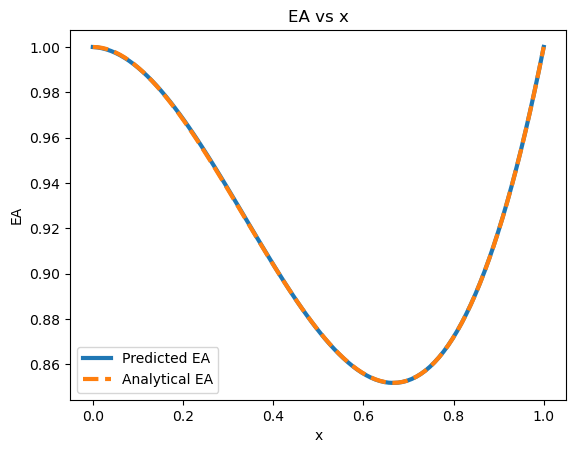

In [10]:
# plot the results and training losses. Refer the pptx file results slide for more information
plt.plot(x_test.detach().numpy(), EA_test.detach().numpy(), label='Predicted EA',  lw=3)
plt.plot(x_test.detach().numpy(), EA_analytic(x_test).detach().numpy(), label='Analytical EA', linestyle="--", lw=3)
plt.legend()
plt.title('EA vs x')
plt.xlabel('x')
plt.ylabel('EA')
plt.savefig(os.path.join(SAVE_DIR, "0201.png"))
plt.show()

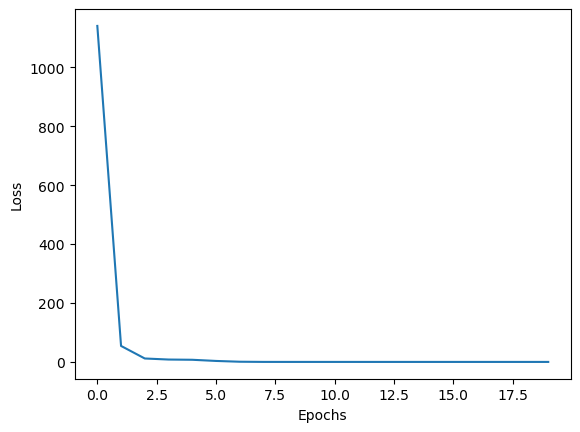

In [11]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig(os.path.join(SAVE_DIR, "0202.png"))
plt.show()